### Exploratory Data Analysis

Importing Necessary Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind  # For statistical tests 
import os

In [2]:
# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)  # Default figure size
os.makedirs('figures', exist_ok=True)  # Create figures directory for saving plots

In [3]:
# --- 1. Load the Dataset ---
print("--- 1. Loading Dataset ---")
file_path = '../data/creditcard_2023.csv'
try:
    df_2023 = pd.read_csv(file_path)
    print(f"Dataset '{file_path}' loaded successfully.")
    print("First 5 Rows of the Dataset:")
    print(df_2023.head())
except FileNotFoundError:
    print(f"Error: Dataset not found at {file_path}. Please check the path.")
    # Exit or handle the error appropriately if the file is critical
    exit()
print("\n" + "="*80 + "\n")  # Separator for clarity

--- 1. Loading Dataset ---
Dataset '../data/creditcard_2023.csv' loaded successfully.
First 5 Rows of the Dataset:
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.21266

Initial Data Inspection

In [4]:
# --- 2. Initial Data Inspection ---
print("--- 2. Initial Data Inspection ---")
print("Dataset Shape:", df_2023.shape)
print("\nData Information (Columns, Non-Null Count, Dtype):")
df_2023.info()  # .info() prints directly
print("\nSummary Statistics (Descriptive Statistics):")
print(df_2023.describe())
print("\nMissing Values (Count per column):")
print(df_2023.isnull().sum())
print("\nInsight: No missing values, which simplifies preprocessing. All features are numerical.")
print("The 'id' column is a unique identifier, not a feature for modeling.")
print("Observe the 'Class' mean in describe() for initial confirmation of balance.")
print("\n" + "="*80 + "\n")

--- 2. Initial Data Inspection ---
Dataset Shape: (568630, 31)

Data Information (Columns, Non-Null Count, Dtype):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     5

Class Imbalance Analysis

In [5]:
# --- 3. Class Balance Analysis ---
print("--- 3. Class Balance Analysis ---")
class_counts = df_2023['Class'].value_counts()
print("Distribution of 'Class' (0: Legitimate, 1: Fraud):")
print(class_counts)
print("\nPercentage of 'Class' (0: Legitimate, 1: Fraud):")
print(df_2023['Class'].value_counts(normalize=True) * 100)

--- 3. Class Balance Analysis ---
Distribution of 'Class' (0: Legitimate, 1: Fraud):
Class
0    284315
1    284315
Name: count, dtype: int64

Percentage of 'Class' (0: Legitimate, 1: Fraud):
Class
0    50.0
1    50.0
Name: proportion, dtype: float64


C:\Users\PAVITHRAN\AppData\Local\Temp\ipykernel_25740\2564778329.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df_2023, palette='viridis')


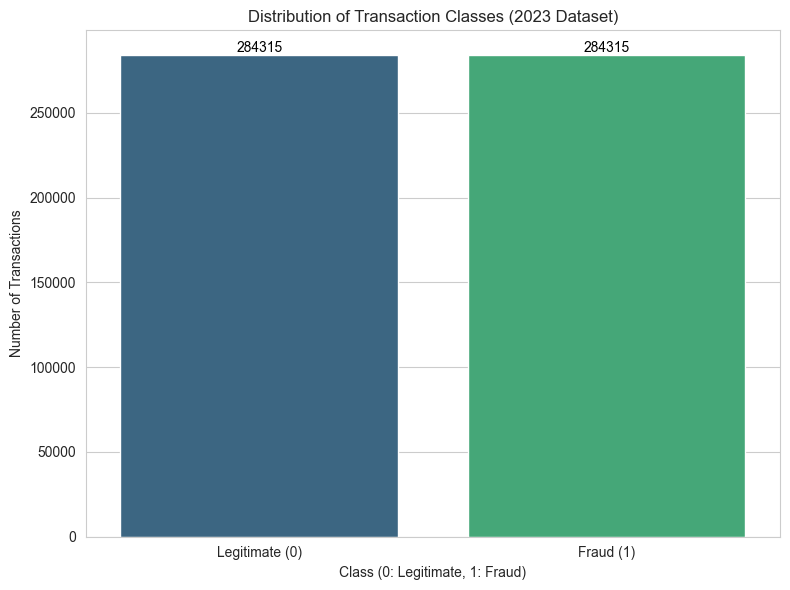

In [7]:
# Visualize Class Distribution (Bar Plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df_2023, palette='viridis')
plt.title('Distribution of Transaction Classes (2023 Dataset)')
plt.xlabel('Class (0: Legitimate, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Legitimate (0)', 'Fraud (1)'])
# Add text labels for counts
plt.text(0, class_counts[0], f'{class_counts[0]}', ha='center', va='bottom', color='black', fontsize=10)
plt.text(1, class_counts[1], f'{class_counts[1]}', ha='center', va='bottom', color='black', fontsize=10)
plt.tight_layout()
plt.savefig('figures/class_distribution_2023.png')
plt.show()

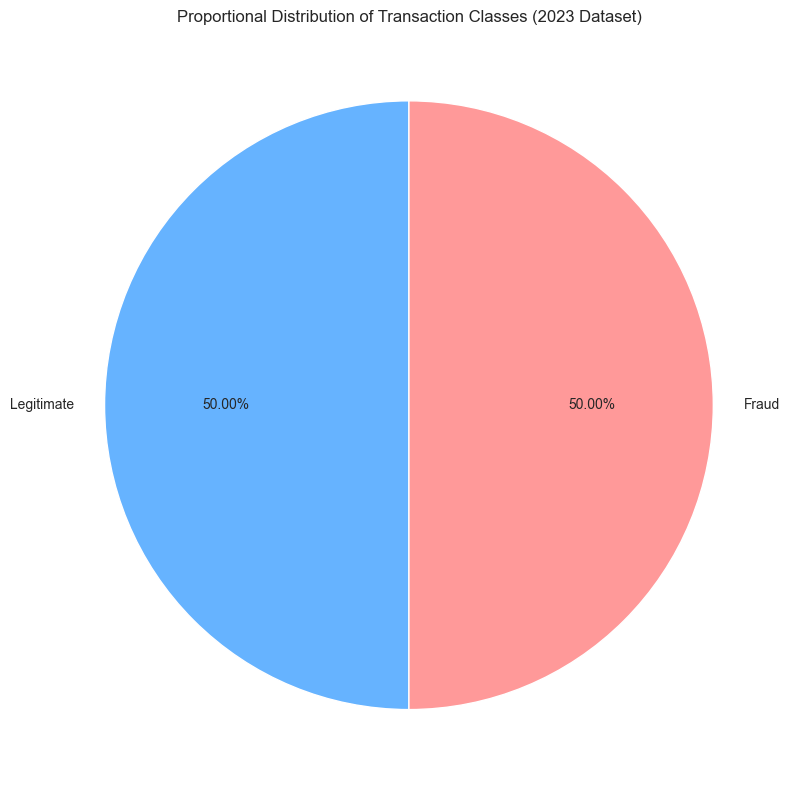


Insight: The 2023 dataset exhibits a perfect 50/50 class balance, confirming our earlier discovery.
This is a significant difference from the 2013 dataset and implies that typical imbalance handling techniques (like SMOTE for correction) are not required here.




In [8]:
# Visualize Class Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=['Legitimate', 'Fraud'], autopct='%1.2f%%',
        colors=['#66b3ff', '#ff9999'], startangle=90)
plt.title('Proportional Distribution of Transaction Classes (2023 Dataset)')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie
plt.tight_layout()
plt.savefig('figures/class_pie_2023.png')
plt.show()

print("\nInsight: The 2023 dataset exhibits a perfect 50/50 class balance, confirming our earlier discovery.")
print("This is a significant difference from the 2013 dataset and implies that typical imbalance handling techniques (like SMOTE for correction) are not required here.")
print("\n" + "="*80 + "\n")

Distribution Analysis of 'Amount'

--- 4. Distribution Analysis of 'Amount' ---


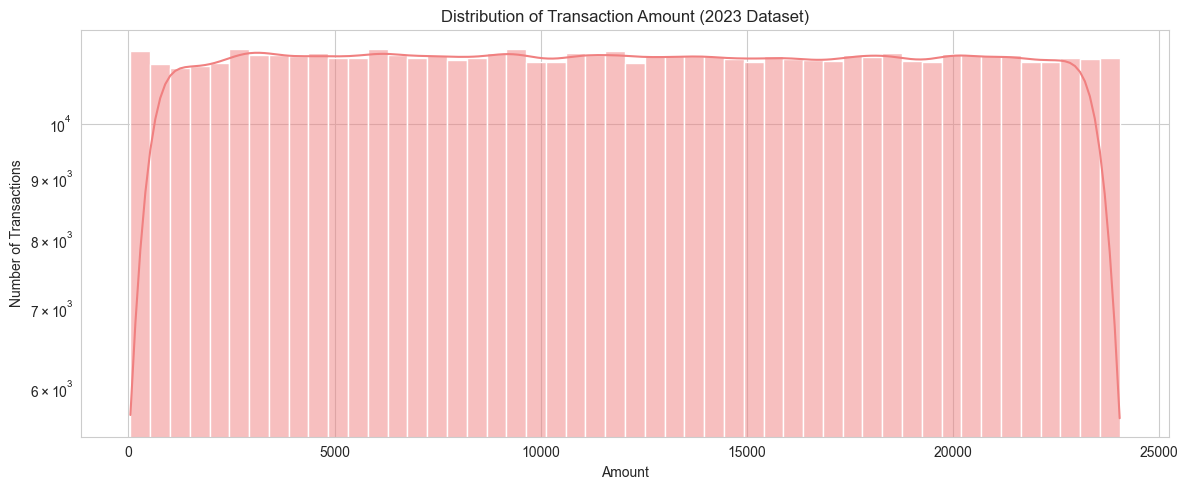


'Amount' distribution shows a wide range, potentially with some skewness or multiple modes.


In [9]:
# --- 4. Distribution Analysis of 'Amount' ---
print("--- 4. Distribution Analysis of 'Amount' ---")
# 'Amount' Distribution (Histogram)
plt.figure(figsize=(12, 5))
sns.histplot(df_2023['Amount'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Transaction Amount (2023 Dataset)')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')  # Use log scale due to heavy right skew or wide range
plt.tight_layout()
plt.savefig('figures/amount_histogram_2023.png')
plt.show()

print("\n'Amount' distribution shows a wide range, potentially with some skewness or multiple modes.")

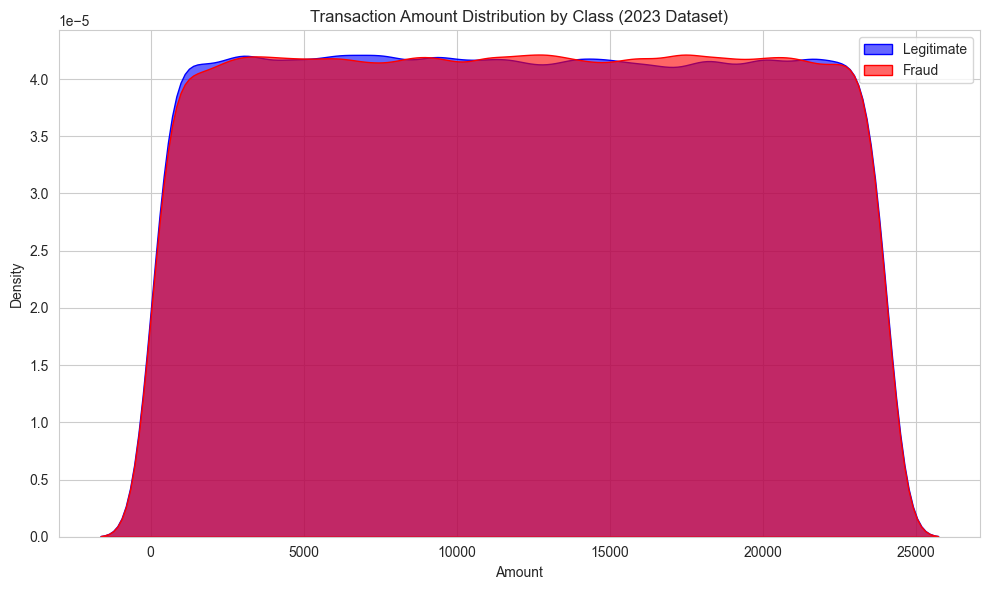

In [10]:
# Compare 'Amount' for Fraud vs. Non-Fraud (Density Plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_2023[df_2023['Class'] == 0]['Amount'], label='Legitimate', fill=True, color='blue', alpha=0.6)
sns.kdeplot(data=df_2023[df_2023['Class'] == 1]['Amount'], label='Fraud', fill=True, color='red', alpha=0.6)
plt.title('Transaction Amount Distribution by Class (2023 Dataset)')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/amount_kde_2023.png')
plt.show()

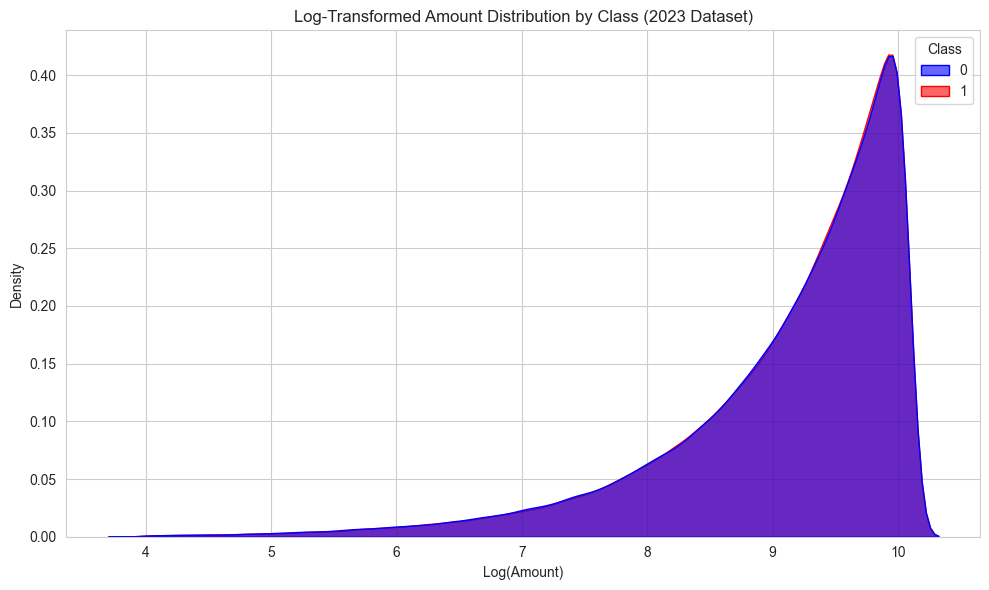


Insight: Compare the 'Amount' distributions for legitimate and fraudulent transactions. Look for any noticeable shifts or distinct patterns.
Log-transformed Amount may reveal clearer differences due to reduced skewness.




In [11]:
# Log-Transformed Amount
df_2023['Log_Amount'] = np.log1p(df_2023['Amount'])  # log1p to handle zero values
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_2023, x='Log_Amount', hue='Class', fill=True, palette=['blue', 'red'], alpha=0.6)
plt.title('Log-Transformed Amount Distribution by Class (2023 Dataset)')
plt.xlabel('Log(Amount)')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/log_amount_kde_2023.png')
plt.show()
df_2023 = df_2023.drop('Log_Amount', axis=1)

print("\nInsight: Compare the 'Amount' distributions for legitimate and fraudulent transactions. Look for any noticeable shifts or distinct patterns.")
print("Log-transformed Amount may reveal clearer differences due to reduced skewness.")
print("\n" + "="*80 + "\n")

Distribution Analysis of Anonymized Features (V1-V28)

--- 5. Distribution Analysis of Anonymized Features (V1-V28) ---


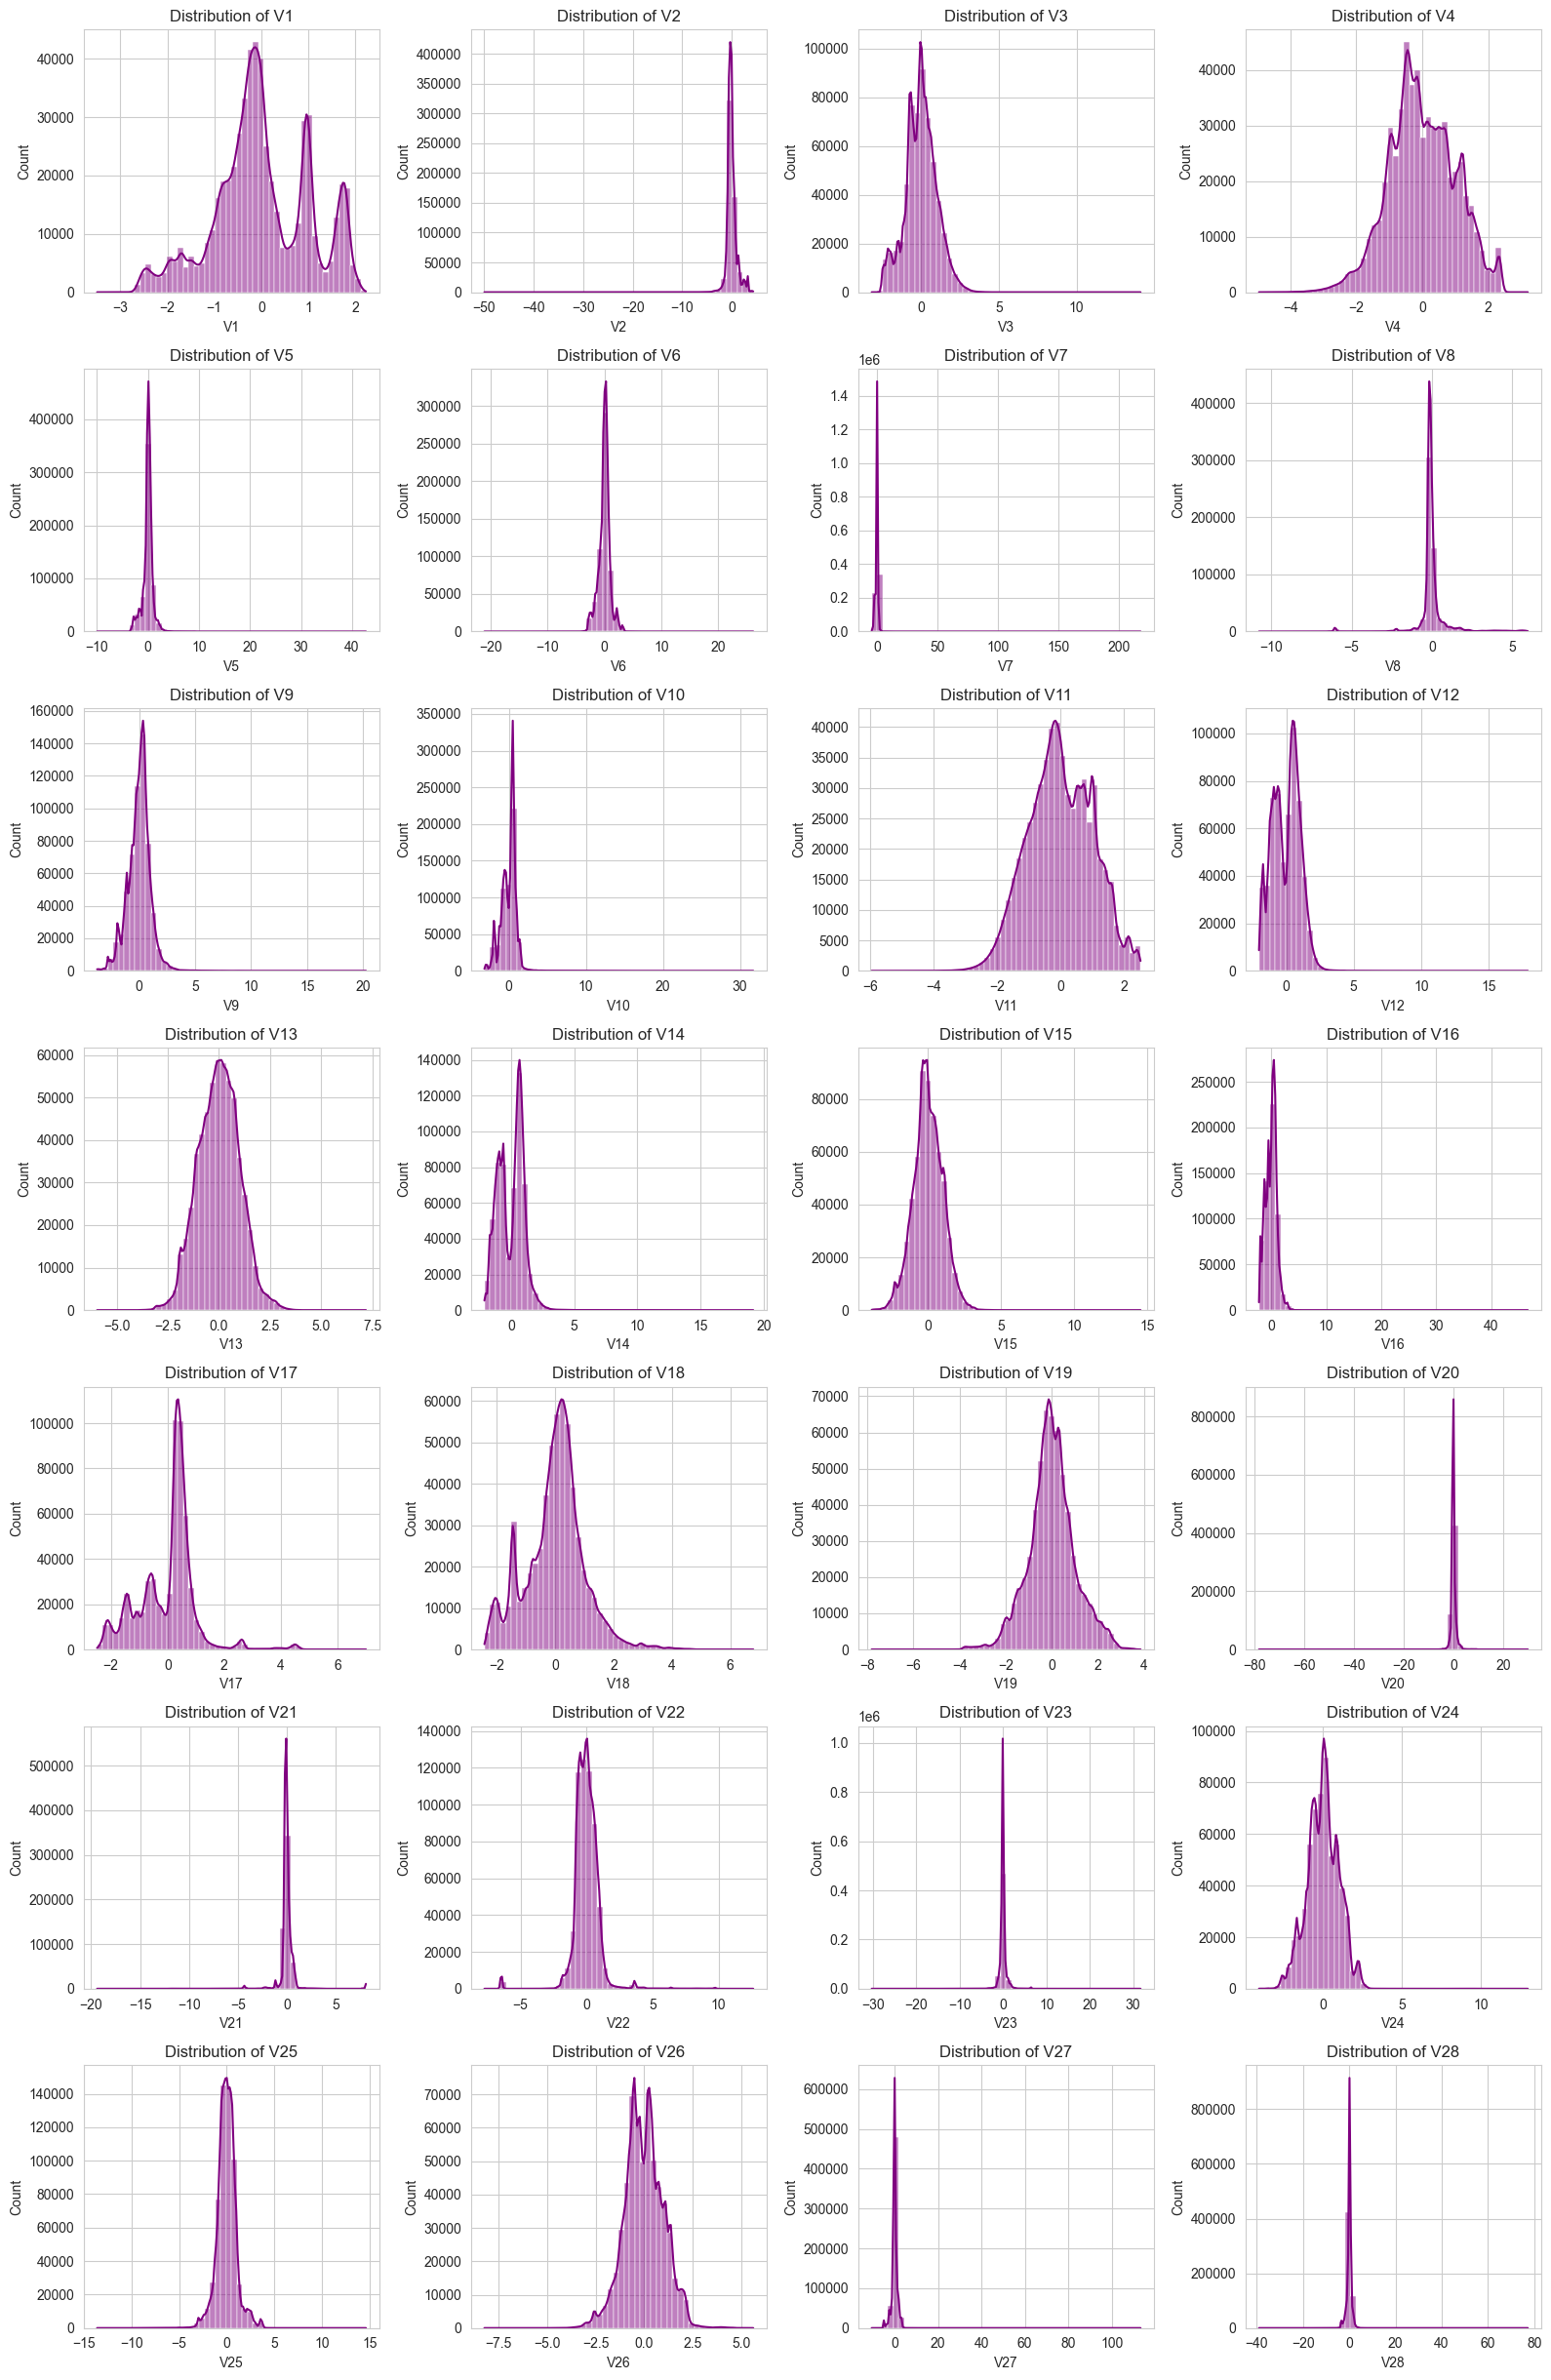


Insight: Observe the general shapes and ranges of the anonymized V-features.
Note: There is no explicit 'Time' column in this dataset. Temporal information might be encoded within these V features.


In [12]:
# --- 5. Distribution Analysis of Anonymized Features (V1-V28) ---
print("--- 5. Distribution Analysis of Anonymized Features (V1-V28) ---")
# V features are not PCA components in this dataset.
# Plotting individual distributions for all V features is thorough.
v_features_to_plot = [f'V{i}' for i in range(1, 29)]
num_cols = 4
num_rows = int(np.ceil(len(v_features_to_plot) / num_cols))
plt.figure(figsize=(num_cols * 4, num_rows * 3.5))  # Adjust figure size dynamically for 28 plots
for i, col in enumerate(v_features_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df_2023[col], bins=50, kde=True, color='purple')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
plt.tight_layout()
plt.savefig('figures/v_features_histogram_2023.png')
plt.show()

print("\nInsight: Observe the general shapes and ranges of the anonymized V-features.")
print("Note: There is no explicit 'Time' column in this dataset. Temporal information might be encoded within these V features.")

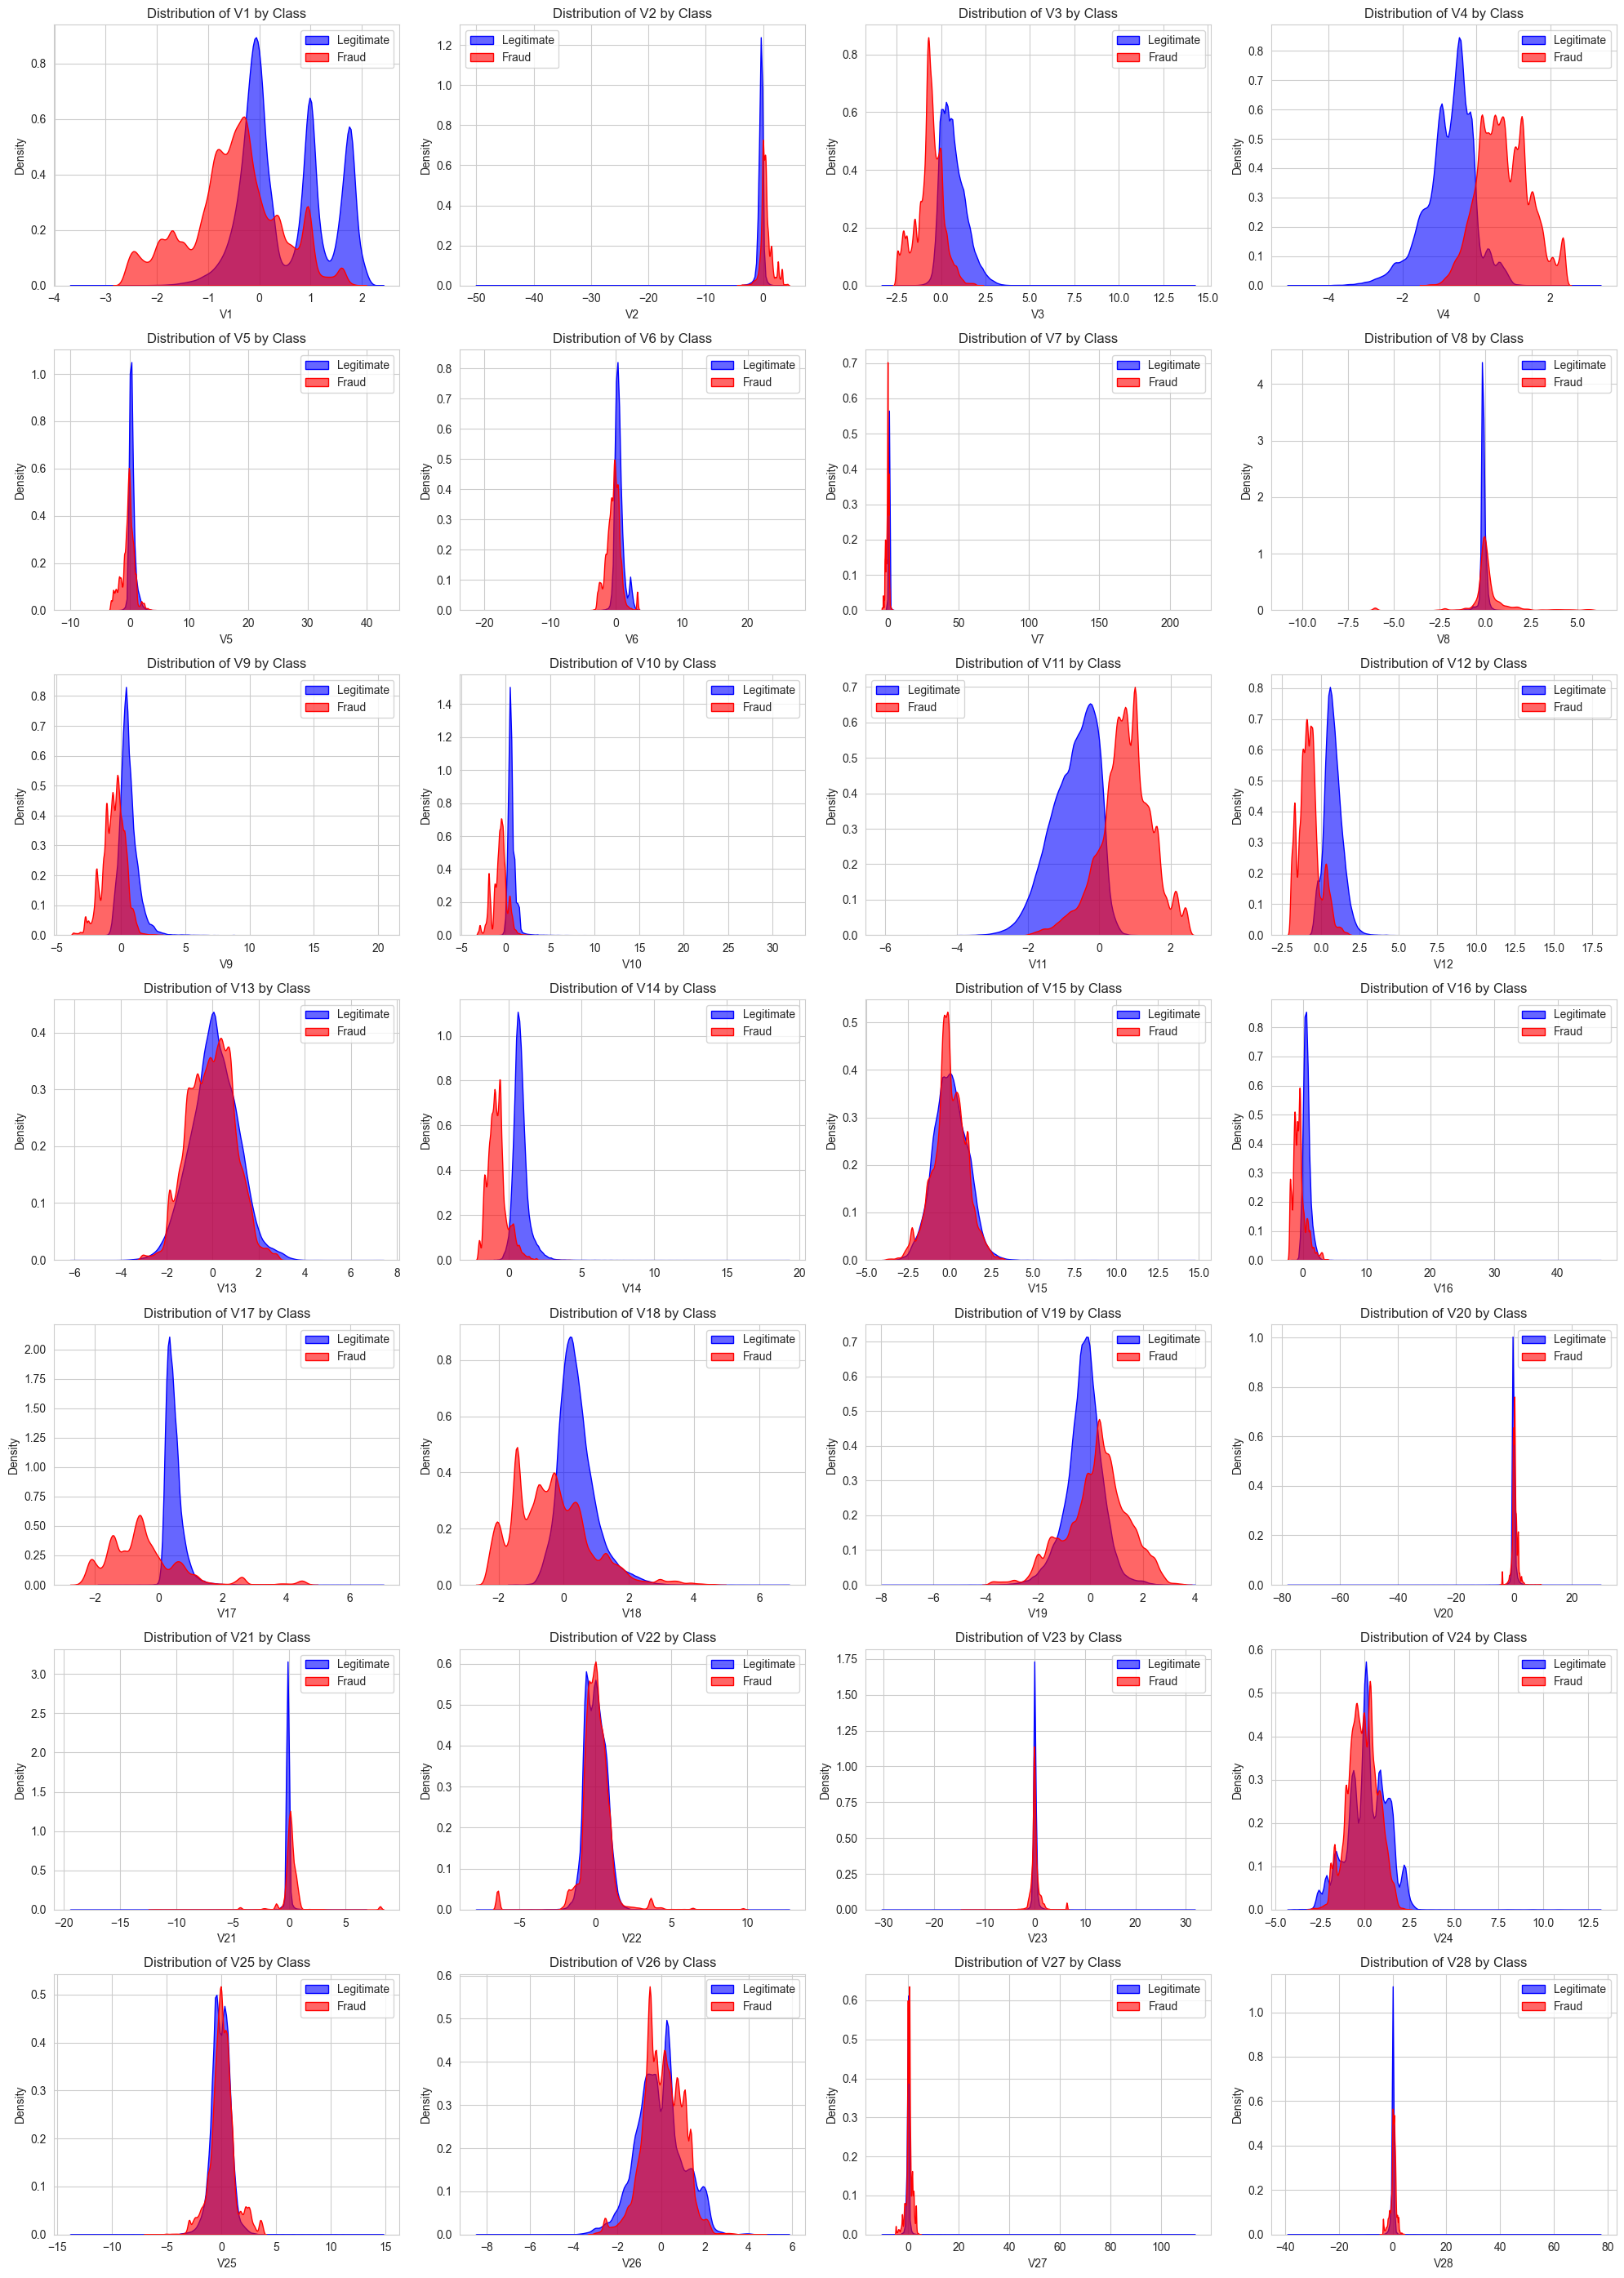


Insight: Identify V-features where the distributions for legitimate and fraudulent transactions show distinct differences or minimal overlap. These will be strong predictors.




In [13]:
# Compare V features for Fraud vs. Non-Fraud (Density Plots)
num_cols_comp = 4
num_rows_comp = int(np.ceil(len(v_features_to_plot) / num_cols_comp))
plt.figure(figsize=(num_cols_comp * 5, num_rows_comp * 4))  # Adjust figure size
for i, col in enumerate(v_features_to_plot):
    plt.subplot(num_rows_comp, num_cols_comp, i + 1)
    sns.kdeplot(data=df_2023[df_2023['Class'] == 0][col], label='Legitimate', fill=True, color='blue', alpha=0.6)
    sns.kdeplot(data=df_2023[df_2023['Class'] == 1][col], label='Fraud', fill=True, color='red', alpha=0.6)
    plt.title(f'Distribution of {col} by Class')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.savefig('figures/v_features_kde_2023.png')
plt.show()

print("\nInsight: Identify V-features where the distributions for legitimate and fraudulent transactions show distinct differences or minimal overlap. These will be strong predictors.")
print("\n" + "="*80 + "\n")

Correlation Analysis

--- 6. Correlation Analysis ---


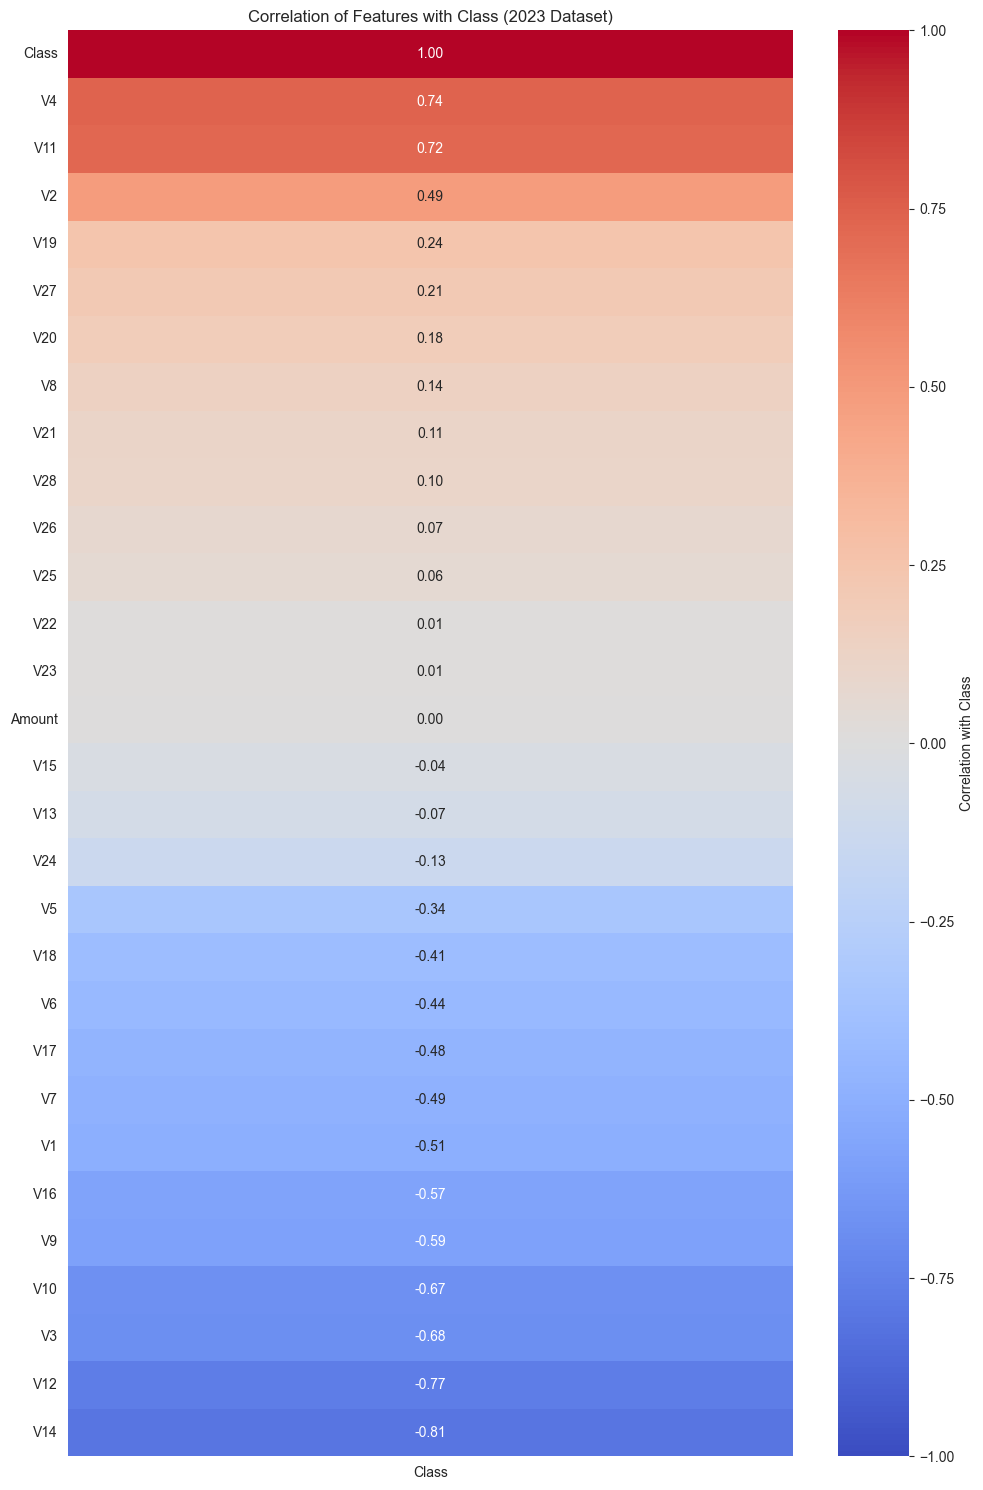

In [14]:
print("--- 6. Correlation Analysis ---")
# Compute full correlation matrix (excluding 'id' as it's just an identifier)
correlation_matrix = df_2023.drop('id', axis=1).corr()
# Plot heatmap focusing on correlations with 'Class'
plt.figure(figsize=(10, 15))
sns.heatmap(correlation_matrix[['Class']].sort_values(by='Class', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation with Class'})
plt.title('Correlation of Features with Class (2023 Dataset)')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('figures/correlation_heatmap_2023.png')
plt.show()

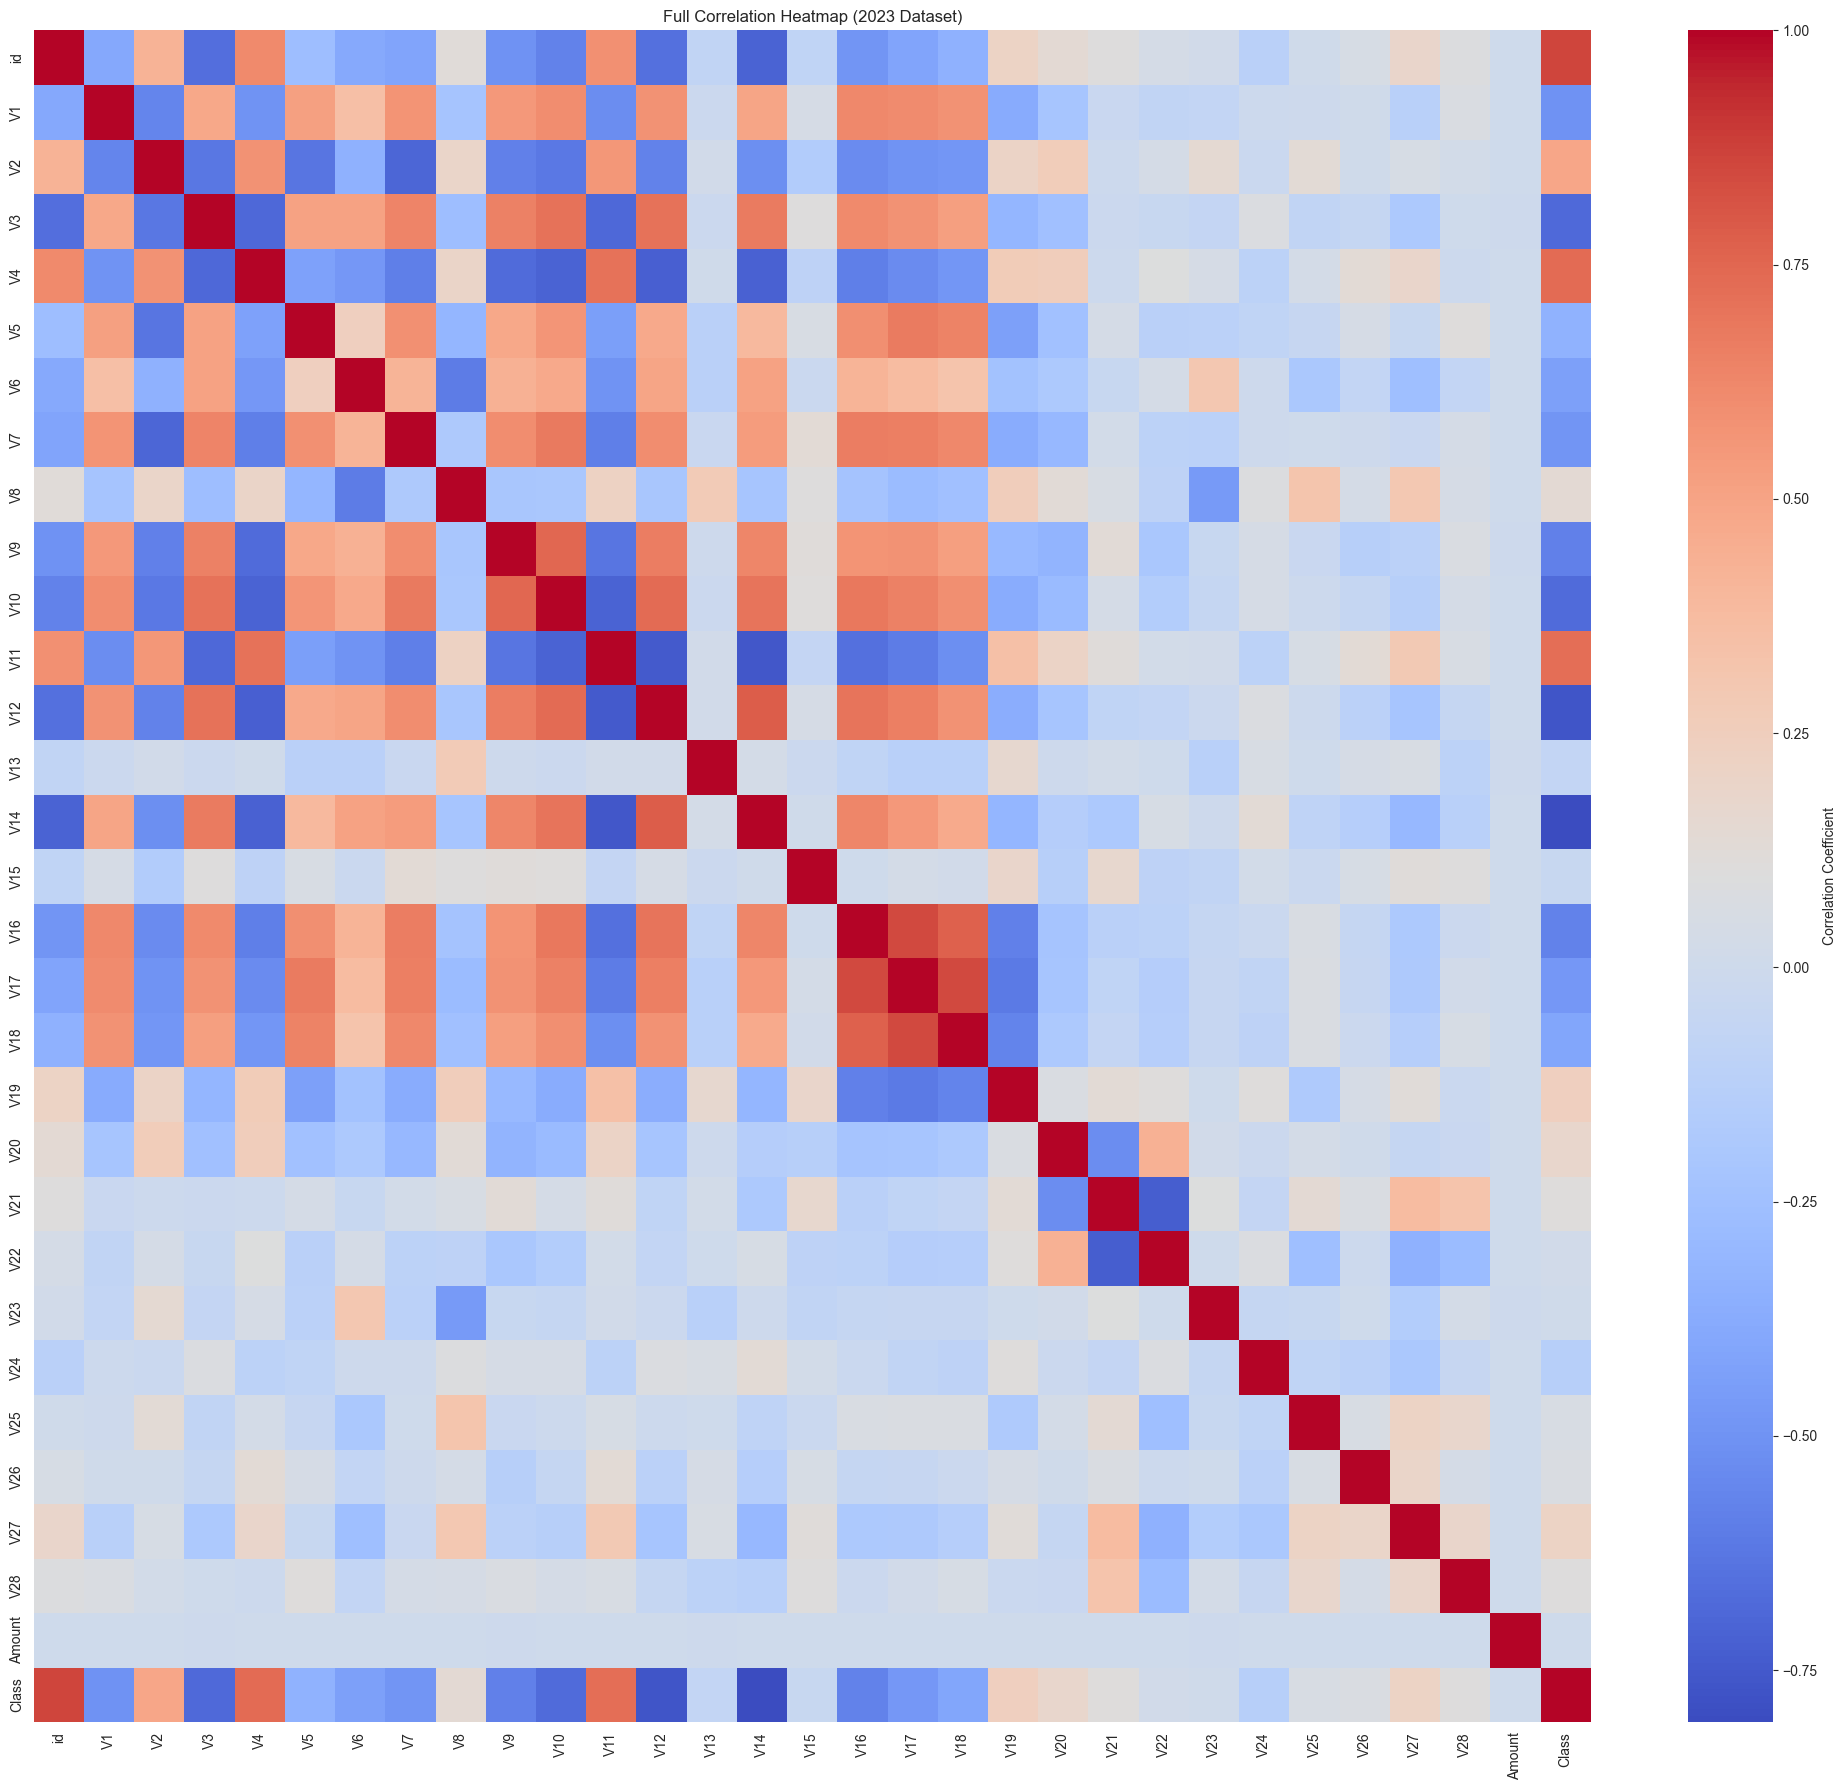

In [15]:
# Compute full correlation matrix
full_correlation_matrix = df_2023.corr()

# Plot heatmap of full correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(full_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f",
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Full Correlation Heatmap (2023 Dataset)')
plt.tight_layout()
plt.savefig('figures/correlation_matrix_2023.png')
plt.show()

In [16]:
# Top correlated features with 'Class' (absolute value)
print("\nTop Features most correlated with 'Class' (absolute value):")
top_correlated_features = correlation_matrix['Class'].abs().sort_values(ascending=False)
print(top_correlated_features[top_correlated_features.index != 'Class'])
print("\nInsight: The correlation heatmap and list highlight features that have the strongest linear relationships with fraud. These are likely key predictors.")
print("\n" + "="*80 + "\n")


Top Features most correlated with 'Class' (absolute value):
V14       0.805669
V12       0.768579
V4        0.735981
V11       0.724278
V3        0.682095
V10       0.673665
V9        0.585522
V16       0.573511
V1        0.505761
V2        0.491878
V7        0.491234
V17       0.476377
V6        0.435088
V18       0.410091
V5        0.338639
V19       0.244081
V27       0.214002
V20       0.179851
V8        0.144294
V24       0.130107
V21       0.109640
V28       0.102024
V13       0.071105
V26       0.071052
V25       0.061847
V15       0.037948
V22       0.014098
V23       0.010255
Amount    0.002261
Name: Class, dtype: float64

Insight: The correlation heatmap and list highlight features that have the strongest linear relationships with fraud. These are likely key predictors.




Statistical Tests (T-test for selected V features between Classes)

In [17]:
# --- 7. Statistical Tests (T-test for selected V features between Classes) ---
print("--- 7. Statistical Tests (T-test for selected V features between Classes) ---")
# Based on visual inspection from density plots and correlations, select some V features
# to perform a statistical test confirming difference in means between classes.
# Adjust 'features_for_ttest' list based on your visual findings.
# For now, let's pick a few with noticeable differences from 2013 and some with high correlation.
features_for_ttest = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                      'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                      'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
ttest_results = []
for feature in features_for_ttest:
    legitimate_values = df_2023[df_2023['Class'] == 0][feature]
    fraud_values = df_2023[df_2023['Class'] == 1][feature]
    # Use Welch's t-test (equal_var=False) as variances are likely unequal
    t_stat, p_val = ttest_ind(legitimate_values, fraud_values, equal_var=False, nan_policy='omit')
    ttest_results.append({'Feature': feature, 'T-Statistic': t_stat, 'P-Value': p_val})
    print(f"T-test for {feature}: t-statistic = {t_stat:.4f}, p-value = {p_val:.4e}")
    if p_val < 0.05:
        print(f" -> Statistically significant difference between legitimate and fraud for {feature}.")
    else:
        print(f" -> No statistically significant difference between legitimate and fraud for {feature}.")
ttest_df = pd.DataFrame(ttest_results)
print("\nT-Test Results Summary:")
print(ttest_df.sort_values(by='P-Value'))
print("\nInsight: T-tests provide statistical evidence for which features have significantly different means between the two classes, supporting their predictive value.")
print("\n" + "="*80 + "\n")

--- 7. Statistical Tests (T-test for selected V features between Classes) ---
T-test for V1: t-statistic = 442.0923, p-value = 0.0000e+00
 -> Statistically significant difference between legitimate and fraud for V1.
T-test for V2: t-statistic = -426.0111, p-value = 0.0000e+00
 -> Statistically significant difference between legitimate and fraud for V2.
T-test for V3: t-statistic = 703.3729, p-value = 0.0000e+00
 -> Statistically significant difference between legitimate and fraud for V3.
T-test for V4: t-statistic = -819.7671, p-value = 0.0000e+00
 -> Statistically significant difference between legitimate and fraud for V4.
T-test for V5: t-statistic = 271.3939, p-value = 0.0000e+00
 -> Statistically significant difference between legitimate and fraud for V5.
T-test for V6: t-statistic = 364.3861, p-value = 0.0000e+00
 -> Statistically significant difference between legitimate and fraud for V6.
T-test for V7: t-statistic = 425.2759, p-value = 0.0000e+00
 -> Statistically significant di

Outlier Analysis

In [18]:
# --- 8. Outlier Analysis ---
print("--- 8. Outlier Analysis ---")
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"\nOutliers in {column}: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    return outliers

--- 8. Outlier Analysis ---


In [19]:
# Analyze outliers for Amount and key V features
detect_outliers(df_2023, 'Amount')
for feature in ['V4', 'V14', 'V17']:  # Based on Phase 1 findings
    detect_outliers(df_2023, feature)


Outliers in Amount: 0 (0.00%)

Outliers in V4: 2766 (0.49%)

Outliers in V14: 1088 (0.19%)

Outliers in V17: 14890 (2.62%)


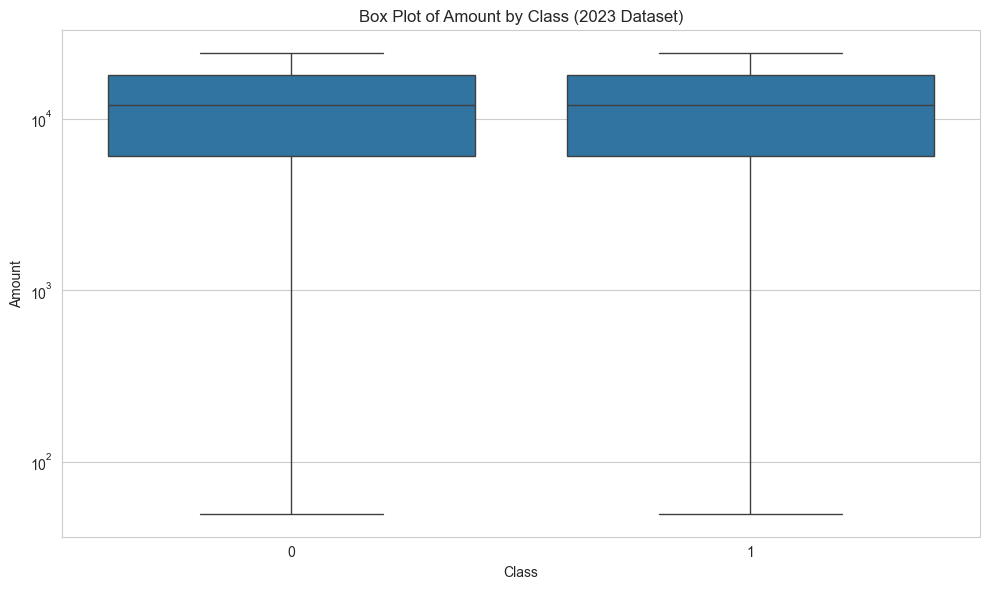


Insight: Outliers may influence model performance and could be addressed in preprocessing (e.g., capping or transformation).




In [20]:
# Box plot for Amount by Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df_2023)
plt.title('Box Plot of Amount by Class (2023 Dataset)')
plt.yscale('log')  # Log scale for better visualization
plt.tight_layout()
plt.savefig('figures/amount_boxplot_2023.png')
plt.show()

print("\nInsight: Outliers may influence model performance and could be addressed in preprocessing (e.g., capping or transformation).")
print("\n" + "="*80 + "\n")

Temporal Analysis Using 'id'

--- 9. Temporal Analysis Using 'id' ---


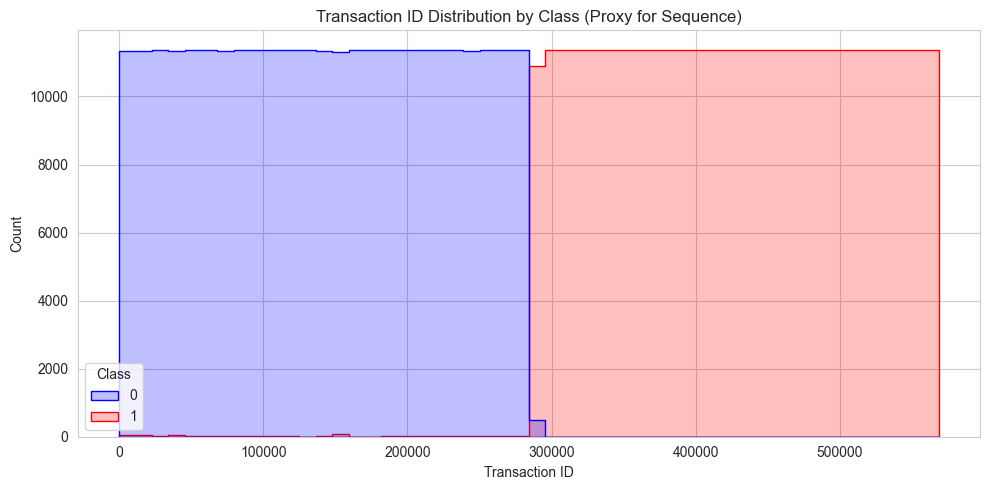

In [21]:
# --- 9. Temporal Analysis Using 'id' ---
print("--- 9. Temporal Analysis Using 'id' ---")
# Histogram of 'id' by Class
plt.figure(figsize=(10, 5))
sns.histplot(data=df_2023, x='id', hue='Class', bins=50, palette=['blue', 'red'], element='step')
plt.title('Transaction ID Distribution by Class (Proxy for Sequence)')
plt.xlabel('Transaction ID')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/id_distribution_2023.png')
plt.show()

In [22]:
# Correlation of 'id' with V features
id_correlations = df_2023.corr()['id'].sort_values(ascending=False)
print("\nCorrelations of 'id' with Other Features:")
print(id_correlations)


Correlations of 'id' with Other Features:
id        1.000000
Class     0.864283
V4        0.617554
V11       0.589321
V2        0.424267
V19       0.216276
V27       0.184195
V20       0.145803
V8        0.121282
V21       0.097948
V28       0.086822
V26       0.052126
V22       0.036106
V23       0.017594
V25       0.005586
Amount    0.001710
V13      -0.076331
V15      -0.080004
V24      -0.116685
V5       -0.268445
V18      -0.341056
V6       -0.387916
V1       -0.395741
V7       -0.414288
V17      -0.417226
V16      -0.494255
V9       -0.508427
V10      -0.578014
V12      -0.652940
V3       -0.663655
V14      -0.709346
Name: id, dtype: float64


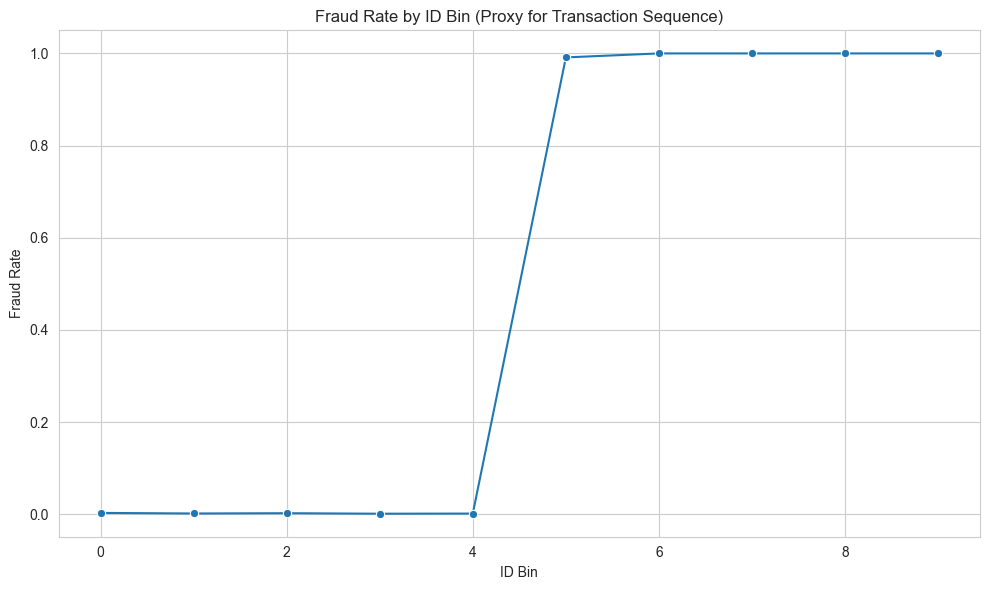


Insight: The 'id' column may encode sequential information, with fraud rates potentially varying across bins, suggesting temporal patterns.




In [23]:
# Fraud rate by ID bin
df_2023['id_bin'] = pd.qcut(df_2023['id'], q=10, labels=False)
fraud_rate_by_bin = df_2023.groupby('id_bin')['Class'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=fraud_rate_by_bin.index, y=fraud_rate_by_bin.values, marker='o')
plt.title('Fraud Rate by ID Bin (Proxy for Transaction Sequence)')
plt.xlabel('ID Bin')
plt.ylabel('Fraud Rate')
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/fraud_rate_id_bin_2023.png')
plt.show()
df_2023 = df_2023.drop('id_bin', axis=1)

print("\nInsight: The 'id' column may encode sequential information, with fraud rates potentially varying across bins, suggesting temporal patterns.")
print("\n" + "="*80 + "\n")

Feature Interaction Analysis

--- 10. Feature Interaction Analysis ---


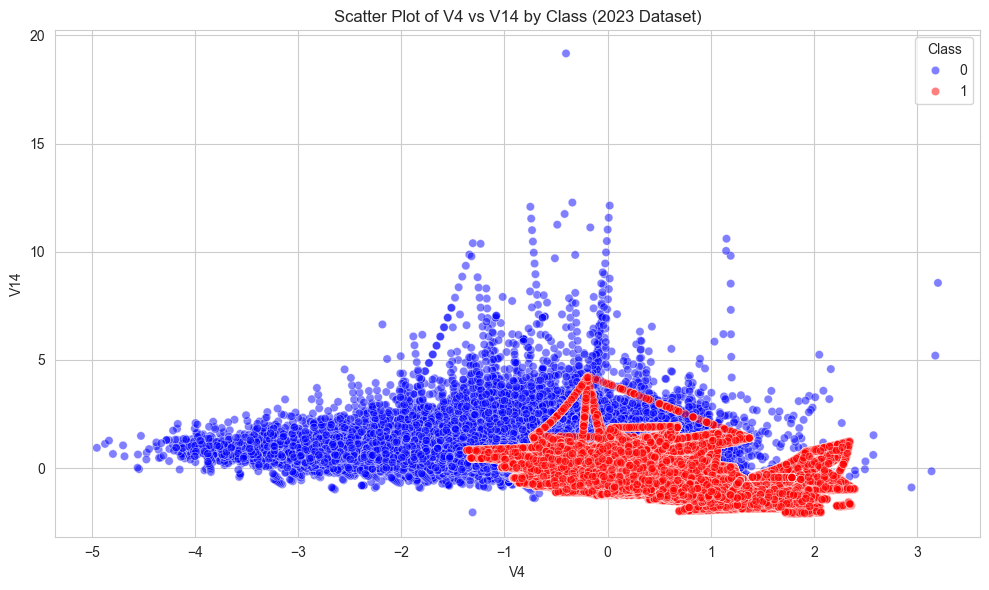


Insight: Interactions between key features may reveal non-linear patterns useful for modeling (e.g., feature engineering).




In [24]:
# --- 10. Feature Interaction Analysis ---
print("--- 10. Feature Interaction Analysis ---")
# Scatter plot for V4 vs V14 (based on likely high correlation from Phase 1)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_2023, x='V4', y='V14', hue='Class', palette=['blue', 'red'], alpha=0.5)
plt.title('Scatter Plot of V4 vs V14 by Class (2023 Dataset)')
plt.xlabel('V4')
plt.ylabel('V14')
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/v4_v14_scatter_2023.png')
plt.show()

print("\nInsight: Interactions between key features may reveal non-linear patterns useful for modeling (e.g., feature engineering).")
print("\n" + "="*80 + "\n")

Skewness and Kurtosis Analysis

In [25]:
# --- 11. Skewness and Kurtosis Analysis ---
print("--- 11. Skewness and Kurtosis Analysis ---")
skewness = df_2023.drop('id', axis=1).skew()
kurtosis = df_2023.drop('id', axis=1).kurtosis()
stats_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
print("\nSkewness and Kurtosis of Features:")
print(stats_df.sort_values(by='Skewness', ascending=False))

print("\nInsight: High skewness or kurtosis in features (e.g., Amount) suggests the need for transformations (e.g., log) in preprocessing.")
print("\n" + "="*80 + "\n")

--- 11. Skewness and Kurtosis Analysis ---

Skewness and Kurtosis of Features:
         Skewness     Kurtosis
V7      19.026866  4017.608217
V27      2.755452   301.001091
V28      1.724978   162.115475
V5       1.506414    47.099352
V10      0.740414    13.164785
V17      0.373061     2.734309
V22      0.318529    23.260677
V8       0.299972    18.939202
V16      0.266407     8.658623
V14      0.207835     0.899463
V9       0.171057     3.639324
V18      0.129191     0.881364
V12      0.066759    -0.213808
V24      0.066090     1.324842
V25      0.023008     3.243759
V13      0.014906    -0.007777
V3       0.014622     0.288686
V15      0.011233     0.402172
Amount   0.001656    -1.198864
Class    0.000000    -2.000007
V19     -0.010171     0.748189
V26     -0.018959     0.463593
V11     -0.020891    -0.374930
V4      -0.044169    -0.103355
V1      -0.083417    -0.195511
V23     -0.099687    64.754764
V21     -0.108983    55.442401
V6      -0.201611     4.490510
V2      -1.397952    5

Feature Distribution Statistics by Class

In [26]:
# --- 12. Feature Distribution Statistics by Class ---
print("--- 12. Feature Distribution Statistics by Class ---")
# Compute median and IQR for key features by class
key_features = ['Amount', 'V4', 'V14', 'V17']
stats_by_class = []
for feature in key_features:
    legit_stats = df_2023[df_2023['Class'] == 0][feature].describe()[['50%', '25%', '75%']]
    fraud_stats = df_2023[df_2023['Class'] == 1][feature].describe()[['50%', '25%', '75%']]
    stats_by_class.append({
        'Feature': feature,
        'Legitimate_Median': legit_stats['50%'],
        'Fraud_Median': fraud_stats['50%'],
        'Legitimate_IQR': legit_stats['75%'] - legit_stats['25%'],
        'Fraud_IQR': fraud_stats['75%'] - fraud_stats['25%']
    })
stats_df = pd.DataFrame(stats_by_class)
print("\nFeature Statistics by Class (Median and IQR):")
print(stats_df)

print("\nInsight: Differences in median and IQR between classes highlight discriminative features for modeling.")
print("\n" + "="*80 + "\n")

--- 12. Feature Distribution Statistics by Class ---

Feature Statistics by Class (Median and IQR):
  Feature  Legitimate_Median  Fraud_Median  Legitimate_IQR     Fraud_IQR
0  Amount       11996.900000  12062.450000    12005.725000  11959.140000
1      V4          -0.636818      0.682550        0.767464      0.993785
2     V14           0.730065     -0.872700        0.508424      0.699622
3     V17           0.419620     -0.619162        0.287483      1.318913

Insight: Differences in median and IQR between classes highlight discriminative features for modeling.




Comparison with 2013 Dataset

--- 13. Comparison with 2013 Dataset ---


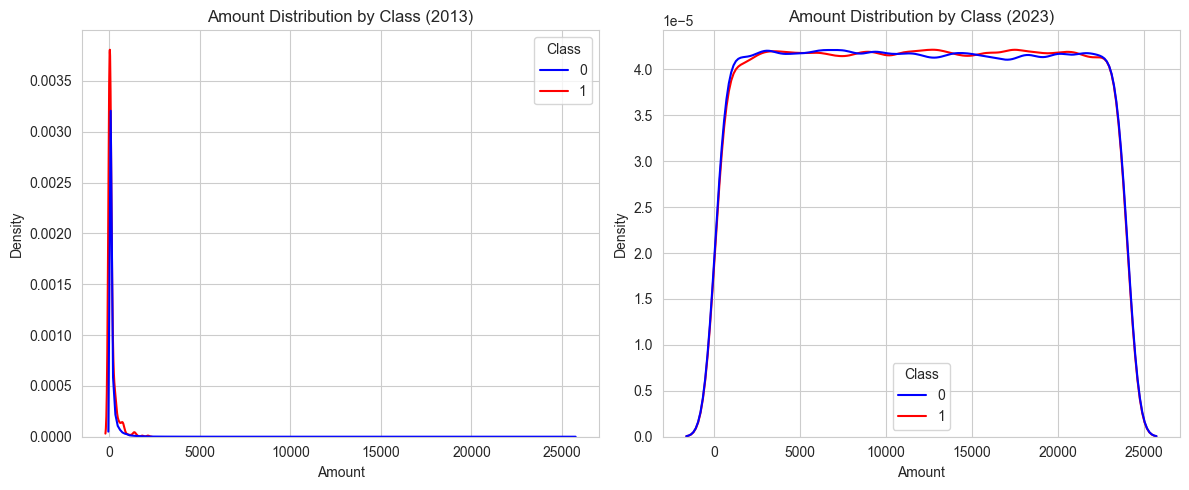


Correlation Comparison (2013 vs 2023):
            2013      2023
Amount  0.005632  0.002261
Time   -0.012323       NaN
V1     -0.101347 -0.505761
V10    -0.216883 -0.673665
V11     0.154876  0.724278
V12    -0.260593 -0.768579
V13    -0.004570 -0.071105
V14    -0.302544 -0.805669
V15    -0.004223 -0.037948
V16    -0.196539 -0.573511
V17    -0.326481 -0.476377
V18    -0.111485 -0.410091
V19     0.034783  0.244081
V2      0.091289  0.491878
V20     0.020090  0.179851
V21     0.040413  0.109640
V22     0.000805  0.014098
V23    -0.002685  0.010255
V24    -0.007221 -0.130107
V25     0.003308  0.061847
V26     0.004455  0.071052
V27     0.017580  0.214002
V28     0.009536  0.102024
V3     -0.192961 -0.682095
V4      0.133447  0.735981
V5     -0.094974 -0.338639
V6     -0.043643 -0.435088
V7     -0.187257 -0.491234
V8      0.019875  0.144294
V9     -0.097733 -0.585522

Insight: Comparing feature distributions and correlations between datasets highlights differences in fraud patterns, infor

In [27]:
# --- 13. Comparison with 2013 Dataset ---
print("--- 13. Comparison with 2013 Dataset ---")
try:
    df_2013 = pd.read_csv('../data/creditcard.csv')
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=df_2013, x='Amount', hue='Class', palette=['blue', 'red'], common_norm=False)
    plt.title('Amount Distribution by Class (2013)')
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df_2023, x='Amount', hue='Class', palette=['blue', 'red'], common_norm=False)
    plt.title('Amount Distribution by Class (2023)')
    plt.tight_layout()
    plt.savefig('figures/amount_comparison_2013_2023.png')
    plt.show()

    corr_2013 = df_2013.corr()['Class'].sort_values(ascending=False)
    corr_2023 = df_2023.drop('id', axis=1).corr()['Class'].sort_values(ascending=False)
    comparison = pd.DataFrame({'2013': corr_2013, '2023': corr_2023}).drop('Class', errors='ignore')
    print("\nCorrelation Comparison (2013 vs 2023):")
    print(comparison)
except FileNotFoundError:
    print("2013 dataset not found. Skipping comparison.")

print("\nInsight: Comparing feature distributions and correlations between datasets highlights differences in fraud patterns, informing concept drift analysis.")
print("\n" + "="*80 + "\n")

print("--- EDA for creditcard_2023.csv (2023) Complete ---")